In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

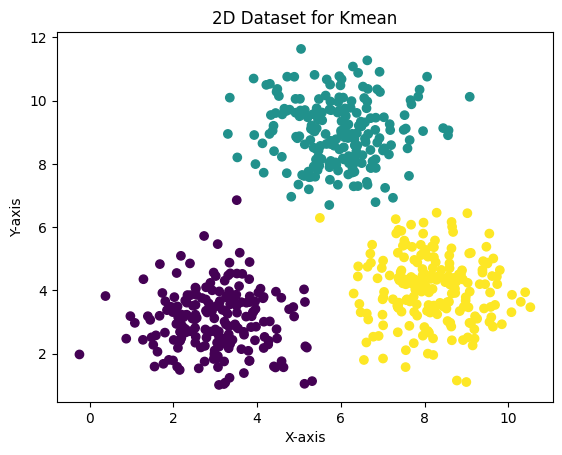

In [88]:
np.random.seed(42)
n_points = 200
class1_points = np.random.normal(loc=[3,3], scale=[1,1], size=(n_points, 2))
class2_points = np.random.normal(loc=[6,9], scale=[1,1], size=(n_points, 2))
class3_points = np.random.normal(loc=[8,4], scale=[1,1], size=(n_points, 2))
all_points = np.concatenate([class1_points, class2_points, class3_points])

labels = np.array([0] * n_points + [1] * n_points + [2] * n_points)

plt.scatter(all_points[:, 0], all_points[:, 1], c=labels, cmap='viridis')
plt.title('2D Dataset for Kmean')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

In [89]:
X = all_points
k = 3

In [90]:
def init_centroids(X, k):
    return X[np.random.choice(X.shape[0], k, replace=True)]

In [91]:
centroids = init_centroids(X, k)

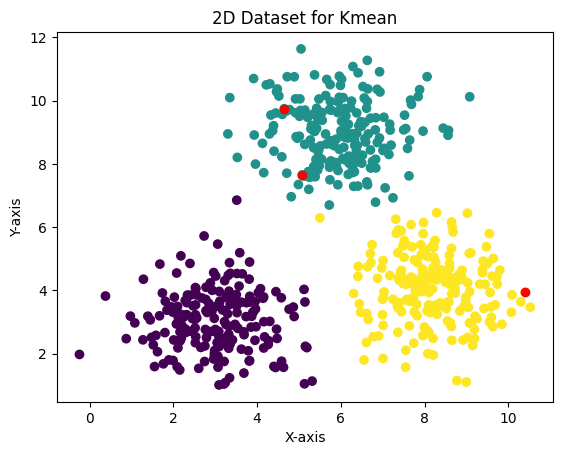

In [92]:
plt.scatter(all_points[:, 0], all_points[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='r')
plt.title('2D Dataset for Kmean')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

In [97]:
D = cdist(X, centroids)
print(D.shape)
np.argmin(D,axis = 1)

(600, 3)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,